<a href="https://colab.research.google.com/github/vikaschaudhary53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Users.csv')

In [4]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books_df.shape

(271360, 8)

####Get the required columns in 'book_df'

In [7]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
#select the columns that we need
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [9]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [10]:
#Rename columns
books_df.rename(columns={'Book-Title':'title', 'Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'}, inplace=True)

In [11]:
books_df.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [12]:
books_df.dropna(inplace = True)
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271357 non-null  object
 1   title      271357 non-null  object
 2   author     271357 non-null  object
 3   year       271357 non-null  object
 4   publisher  271357 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


###Know about the users

In [13]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [14]:
users_df.shape

(278858, 3)

In [15]:
#renaming all the columns to small case
users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'}, inplace=True)

In [16]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


###Know about ratings dataframe

In [18]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [19]:
ratings_df.shape

(1149780, 3)

In [20]:
#Rename the columns
ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'}, inplace=True)

In [21]:
ratings_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


####Filtering on the basis of:
1. Book at least has the ratings by 50 readers.
2. Reader at least has rated 200 books.

In [22]:
ratings_df['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [23]:
ratings_df['user_id'].value_counts().shape

(105283,)

In [24]:
#keeping users with at least rating more than 200
ratings_df['user_id'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [25]:
x=ratings_df['user_id'].value_counts()>200

In [26]:
x[x].shape

(899,)

In [27]:
y=x[x].index

In [28]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [29]:
ratings_df=ratings_df[ratings_df['user_id'].isin(y)]

In [30]:
ratings_df

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


###Joining 'ratings_df' with 'books_df'

In [31]:
books_rating = ratings_df.merge(books_df, on='ISBN')

In [32]:
books_rating

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [33]:
number_rating=books_rating.groupby('title')['rating'].count().reset_index()

In [34]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [35]:
number_rating.rename(columns={'rating':'number_of_ratings'}, inplace=True)

In [36]:
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [37]:
#joining the rating with title
final_rating = books_rating.merge(number_rating, on='title')

In [38]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [39]:
final_rating = final_rating[final_rating['number_of_ratings']>50]

In [40]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [159]:
final_rating.isna().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [160]:
final_rating.isnull().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [161]:
final_rating.describe()

,user_id,rating,number_of_ratings
count,57952.000000,57952.000000,57952.000000
mean,141566.786720,1.992321,102.263252
std,80487.398989,3.557483,51.837393
min,254.000000,0.000000,51.000000
25%,73394.000000,0.000000,65.000000
50%,141710.000000,0.000000,84.000000
75%,213350.000000,1.000000,122.000000
max,278418.000000,10.000000,363.000000


In [186]:
booksWithNoYear = list(final_rating[final_rating['year'] == 0]['title'].value_counts().keys())

In [189]:
len(booksWithNoYear)

27

In [193]:
final_rating[final_rating['title']==booksWithNoYear[0]]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
51459,278418,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51460,2766,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51461,7346,1559029838,8,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51462,9856,1559029838,8,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51463,11676,1559029838,9,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
...,...,...,...,...,...,...,...,...
51540,273979,1559029838,9,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51541,23768,014130538X,0,Call of the Wild,Jack London,1999,Puffin Books,88
51542,127429,0895772116,0,Call of the Wild,Jack London,1985,Random House Childrens Books,88
51544,155014,0590430033,8,Call of the Wild,Jack London,1987,Scholastic,88


In [196]:
final_rating[final_rating['publisher'] == 'Selldowns/no More Orders']

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
51459,278418,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51460,2766,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51461,7346,1559029838,8,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51462,9856,1559029838,8,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51463,11676,1559029838,9,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
...,...,...,...,...,...,...,...,...
51536,251422,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51537,260897,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51538,268330,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88
51539,269719,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,88


###Drop The Above Book

In [197]:
final_rating[final_rating['title']==booksWithNoYear[1]]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
105810,6575,0140143505,0,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105811,11676,0140143505,10,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105812,16966,0140143505,9,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105813,56399,0140143505,10,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105814,69078,0140143505,0,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105815,76626,0140143505,9,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105816,76818,0140143505,10,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105817,93047,0140143505,9,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105818,111174,0140143505,0,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54
105819,125039,0140143505,0,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,54


The above book was published in 1982

In [191]:
final_rating[final_rating['title']==booksWithNoYear[0]]['year'].value_counts()

0       82
1987     2
1999     1
1985     1
Name: year, dtype: int64

'year' is not present in the above dataframe

In [175]:
final_rating['year'].value_counts(ascending = False)[:50]

2002    6950
1999    5765
2001    4949
2000    4385
1998    4160
2003    4137
1996    3883
1997    3561
1994    2962
1995    2767
1993    2329
1992    2140
2004    1371
1990    1337
1989    1187
1991    1053
1986     980
1987     897
1988     729
1984     464
1983     376
1985     284
1982     250
0        175
1976     149
1978     142
1959     116
1981      69
1974      66
1979      60
1980      37
1968      28
1975      20
2001      17
1999      15
2000      14
1993       8
2002       7
1995       7
1992       7
1998       7
1961       6
2003       6
1996       6
1977       5
1960       5
1994       5
1980       5
1943       4
1971       4
Name: year, dtype: int64

In [147]:
#basic overview
print("Number of Books in final dataset:", len(final_rating.groupby(['title']).count()))
print("Number of Author in final dataset:", len(final_rating.groupby(['author']).count()))
print("Number of Publishers in final dataset:", len(final_rating.groupby(['publisher']).count()))


Number of Books in final dataset: 703
Number of Author in final dataset: 550
Number of Publishers in final dataset: 348


[]

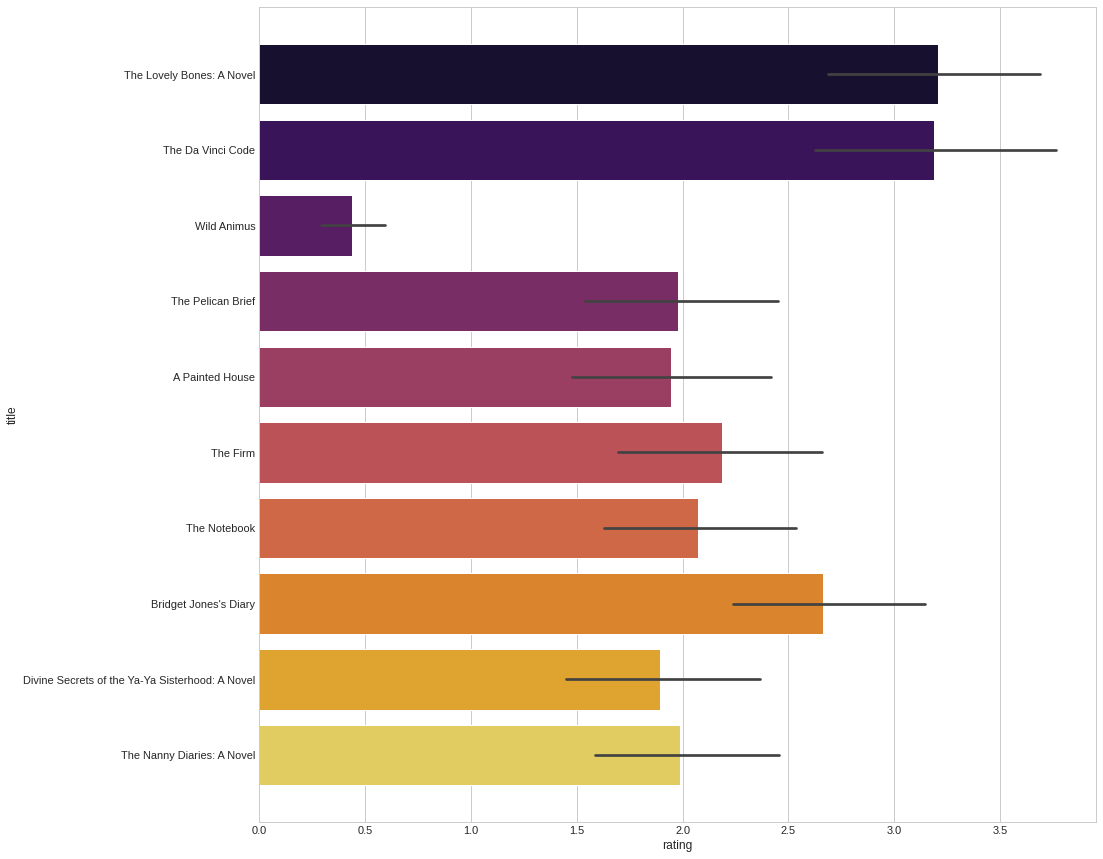

In [41]:
top_ten=final_rating[final_rating['number_of_ratings']>220]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,15])
sns.barplot(x='rating', y='title', data=top_ten,palette='inferno')
plt.plot()

[]

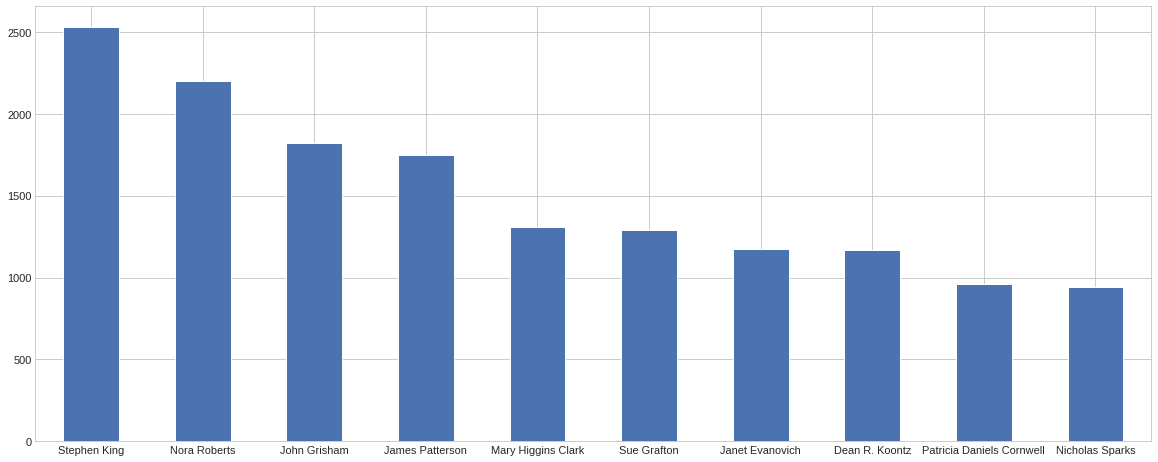

In [42]:
#top 10 authors with highest mentions
top10_mention = final_rating['author'].value_counts()[:10]
plt.figure(figsize=[20,8])
ax = top10_mention.plot.bar(x='lab', y='val', rot=0)
plt.plot()

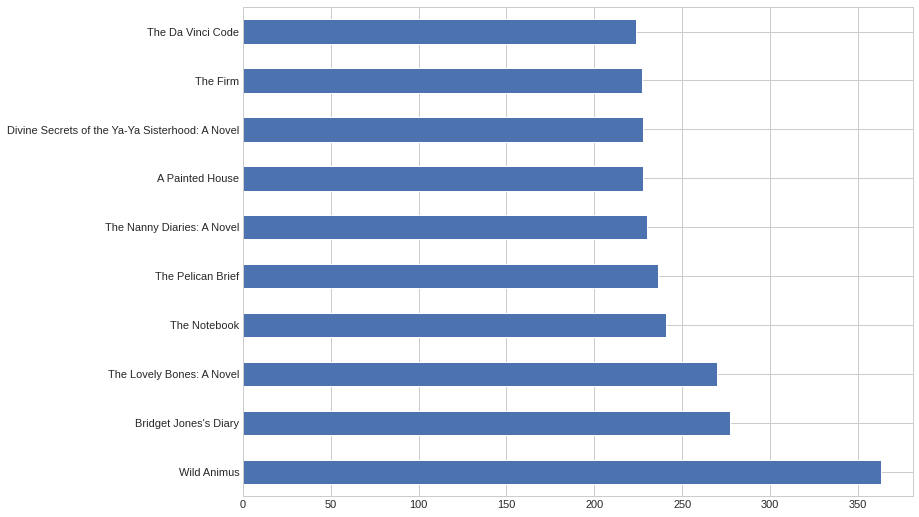

In [43]:
#top 10 books that received ratings with highest mentions
plt.figure(figsize=[12,9])
ax = final_rating['title'].value_counts()[:10].plot.barh()

In [44]:
top_rated=final_rating[final_rating['rating']==10]

[]

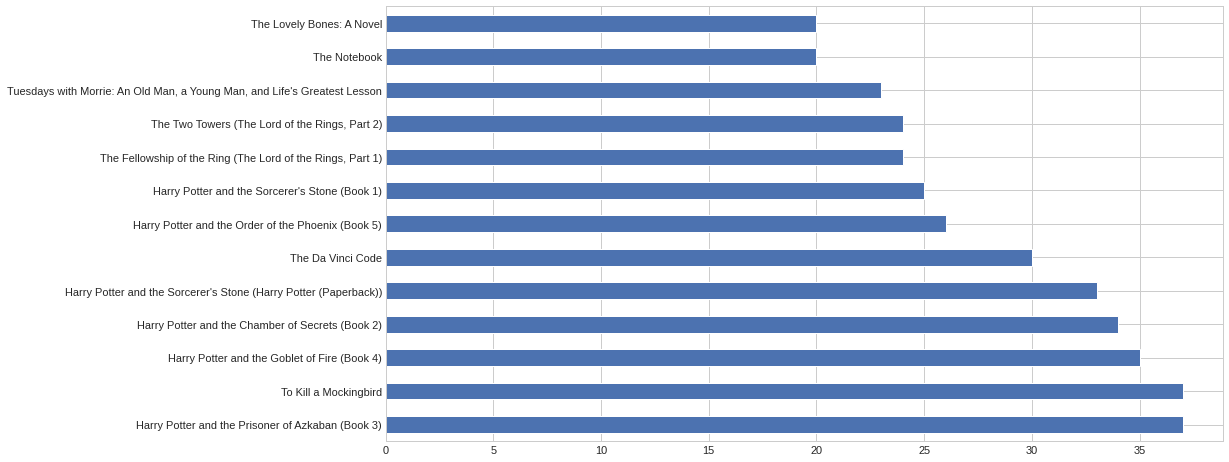

In [45]:
#top books that received 10-rating at least 20 times
plt.figure(figsize=[15,8])
ax = top_rated['title'].value_counts()[:13].plot.barh(x='lab', y='val', rot=0)
plt.plot()

In [77]:
final_rating.head(3)

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [88]:
print("The average rating of all the books is:", round(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False).mean(), 2))

The average rating of all the books is: 1.96


In [95]:
#number of books above rating 3
meanRating_df = pd.DataFrame(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False))

In [101]:
print("There are", len(meanRating_df[meanRating_df['rating']>3]), "books with rating above 3.")

There are 68 books with rating above 3.


In [116]:
meanRating_df = round(meanRating_df['rating'].sort_index(),1)

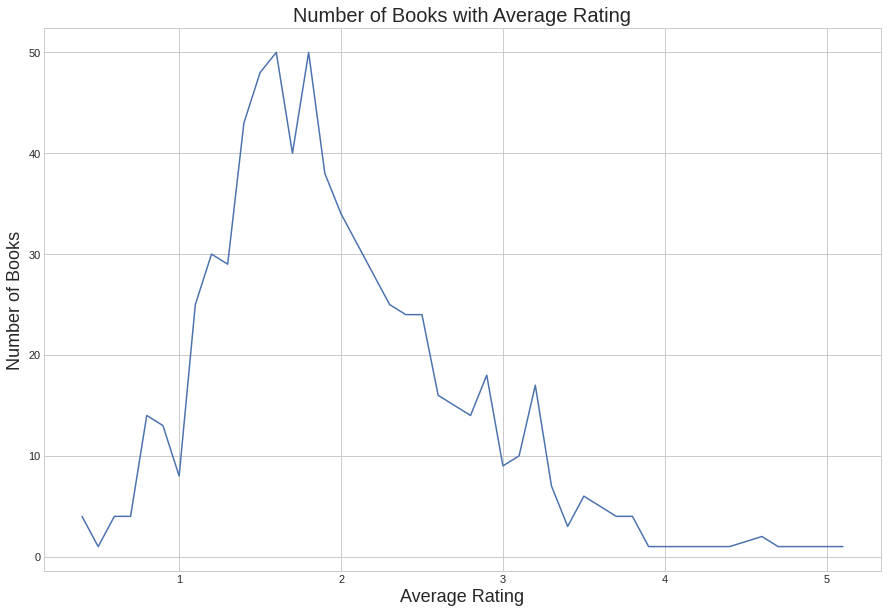

In [132]:
plt.figure(figsize=[15,10])
plt.plot(meanRating_df.value_counts().sort_index())
plt.title ('Number of Books with Average Rating', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.show()

In [47]:
len(top_rated['rating'].unique())
#top_rated=final_rating[final_rating['rating']==10]

1

In [48]:
len(top_rated['title'].unique())

654

In [49]:
top_rated.groupby('title')['number_of_ratings'].count().reset_index()

,title,number_of_ratings
0,1984,11
1,1st to Die: A Novel,10
2,2nd Chance,7
3,84 Charing Cross Road,11
4,A Bend in the Road,3
...,...,...
649,Year of Wonders,5
650,You Belong To Me,2
651,Zen and the Art of Motorcycle Maintenance: An ...,2
652,Zoya,1


In [50]:
top_rated['number_of_ratings'].value_counts(ascending=True)

114      1
133      2
122      2
200      2
163      3
      ... 
78      76
81      97
183    104
53     106
62     107
Name: number_of_ratings, Length: 128, dtype: int64

In [51]:
top_rated[top_rated['number_of_ratings']>200]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
1100,16795,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1108,29259,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1114,36606,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1124,55548,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1163,124363,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
...,...,...,...,...,...,...,...,...
70145,273979,0312278586,10,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,230
70161,36606,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
70179,107301,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
70198,160819,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230


In [52]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [53]:
final_rating.shape

(57952, 8)

###Pivot Table

In [54]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [55]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [56]:
book_pivot.fillna(0, inplace=True)

In [57]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [59]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [60]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [61]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [62]:
np.where(book_pivot.index==237)

(array([], dtype=int64),)

In [63]:
distances, suggestions = model.kneighbors(book_pivot.iloc[356,:].values.reshape(1,-1), n_neighbors=6)

In [64]:
distances

array([[ 0.        , 17.32050808, 17.34935157, 17.66352173, 19.        ,
        19.18332609]])

In [65]:
suggestions

array([[356, 305,   8, 173, 377,  92]])

In [66]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['No Safe Place', 'Long After Midnight', 'A Civil Action', 'Exclusive',
       'Pleading Guilty', 'CAT'S EYE'],
      dtype='object', name='title')


In [67]:
np.where(book_pivot.index=='Animal Farm')[0][0]

47

In [68]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    # if i!=0:
      # print(book_pivot.index[suggestions[i]])
      print(i)

In [69]:
book_recommendation('Animal Farm')

0


In [70]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestions for", book_name, "are: ")
    if not i:
      print(book_pivot.index[suggestions[i]])

In [71]:
book_recommendation('Animal Farm')

The suggestions for Animal Farm are: 
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Pleading Guilty',
       'No Safe Place', 'Foucault's Pendulum'],
      dtype='object', name='title')


In [72]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

The suggestions for Harry Potter and the Chamber of Secrets (Book 2) are: 
Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')
